In [ ]:
#Load all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Load dataset into df
df = pd.read_csv('recruitmentdataset-2022-1.3.csv')
#We are group 1 so Company A -> Cut out all data not company A
is_company_A = df['company'] == 'A'
df_A = df[is_company_A]

**Start Of The One hot Encoding Steps**

In [ ]:
# one hot encoding to convert 'ind-degree' to numerical data
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_A[['ind-degree']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'gender' to numerical data
transformed = ohe.fit_transform(df_A[['gender']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'nationality' to numerical data
transformed = ohe.fit_transform(df_A[['nationality']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'sport' to numerical data
transformed = ohe.fit_transform(df_A[['sport']])
# and add seven new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()

C:\Users\Bilal.h\AppData\Local\Temp\ipykernel_7180\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A[ohe.categories_[0]] = transformed.toarray()
C:\Users\Bilal.h\AppData\Local\Temp\ipykernel_7180\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A[ohe.categories_[0]] = transformed.toarray()
C:\Users\Bilal.h\AppData\Local\Temp\ipykernel_7180\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

**Start Of The Data Tranformation/Normalization Steps**

In [ ]:
# Make a copy from the original dataset of company A as to not overwrite data
df_A_new = df_A.copy()
# Turn the 'decision' column to nuremic values (0 and 1)
df_A_new['decision'] = df_A_new['decision'].astype(int)
# Turn the 'ind-programming_exp' column to nuremic values (0 and 1)
df_A_new['ind-programming_exp'] = df_A_new['ind-programming_exp'].astype(int)
# Turn the 'ind-international_exp' column to nuremic values (0 and 1)
df_A_new['ind-international_exp'] = df_A_new['ind-international_exp'].astype(int)
# Turn the 'ind-entrepeneur_exp' column to nuremic values (0 and 1)
df_A_new['ind-entrepeneur_exp'] = df_A_new['ind-entrepeneur_exp'].astype(int)
# Turn the 'ind-exact_study' column to nuremic values (0 and 1)
df_A_new['ind-exact_study'] = df_A_new['ind-exact_study'].astype(int)
# Turn the 'ind-debateclub' column to nuremic values (0 and 1)
df_A_new['ind-debateclub'] = df_A_new['ind-debateclub'].astype(int)
# Noramlize the 'ind-languages' column to a nuremic value (between 0 and 1)
df_A_new['ind-languages'] = (df_A_new['ind-languages']-df_A_new['ind-languages'] .min())/(df_A_new['ind-languages'] .max()-df_A_new['ind-languages'] .min())
# Noramlize the 'ind-university_grade' column to a nuremic value (between 0 and 1)
df_A_new['ind-university_grade'] = (df_A_new['ind-university_grade']-df_A_new['ind-university_grade'] .min())/(df_A_new['ind-university_grade'] .max()-df_A_new['ind-university_grade'] .min())
# Noramlize the 'ind-age' column to a nuremic value (between 0 and 1)
df_A_new['age'] = (df_A_new['age']-df_A_new['age'] .min())/(df_A_new['age'] .max()-df_A_new['age'] .min())
# Create a new dataset with only the indicators and the 'decision' column to create the corralation table
df_corrs = df_A_new[['decision', 'ind-languages', 'ind-debateclub', 'ind-university_grade', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']]

**Start Of The Trainig/Validation/Test Splitting For M3**

In [ ]:
# Create a training/test split and add features to be used for M3.
# Take 64% percent of the original dataset for the training set
train_set = df_A_new[:640]
# Take 16% percent of the original dataset for the validation set
val_set = df_A_new[640:800]
# Take 20% percent of the original dataset for the test set (200 rows for testing out of 2000 rows)
test_set = df_A_new[800:]

# Create the x_values and y_values
x_train = train_set.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
y_train = train_set["decision"]
x_val = val_set.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
y_val = val_set["decision"]
x_test = test_set.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
y_test = test_set["decision"]

**Some Insprations For GridSearch To Optimize The Choice Of Hyperparameters Of M3**

In [ ]:
#Initialize different values to try for each hyperparameter
params = {
    'n_estimators':  [10,20,30,40,50]
}
#Use the GridSearchCV function on the type of the model with those parameter options.
#Note: the cv decided the k in k-folds.
Model_3 = GridSearchCV(estimator= AdaBoostClassifier(),param_grid=params,cv=10,n_jobs=40,verbose=1, return_train_score=True)
#Fit the training dataset onto it (train the model).
Model_3.fit(x_train, y_train)
#print which hyperparmeter settings out of the given options give the best performance for this model.
print(Model_3.best_params_)
print(Model_3.cv_results_)
df = pd.DataFrame(Model_3.cv_results_)
df.to_csv('cv_results.csv')

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 50}
{'mean_fit_time': array([0.08081856, 0.14561152, 0.19928982, 0.26129897, 0.30647795]), 'std_fit_time': array([0.01444179, 0.04096389, 0.03667918, 0.05207792, 0.04373308]), 'mean_score_time': array([0.01280048, 0.01939988, 0.02810097, 0.03115699, 0.04210348]), 'std_score_time': array([0.00348983, 0.0042718 , 0.0086688 , 0.01525215, 0.01245863]), 'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}, {'n_estimators': 40}, {'n_estimators': 50}], 'split0_test_score': array([0.484375, 0.5     , 0.53125 , 0.546875, 0.546875]), 'split1_test_score': array([0.53125 , 0.609375, 0.578125, 0.625   , 0.65625 ]), 'split2_test_score': array([0.546875, 0.59375 , 0.578125, 0.5625  , 0.59375 ]), 'split3_test_score': array([0.5    , 0.531

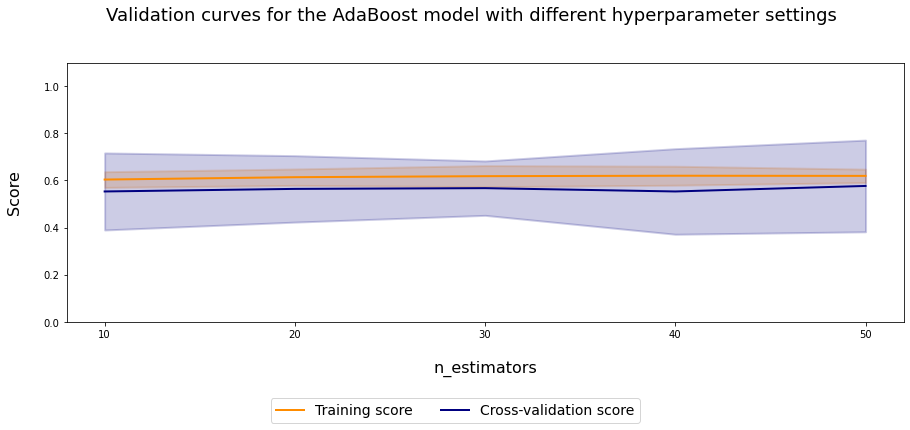

In [ ]:
def pooled_var(stds):
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

grid_params = {
    'n_estimators':  ['10', '20', '30', '40', '50']
}
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (15, 6),
                         sharey='row')
axes.set_ylabel("Score\n", fontsize=16)


for i, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes.set_xlabel("\n" + param_name, fontsize=16)
    axes.set_ylim(0.0, 1.1)
    lw = 2
    axes.plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes.fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes.plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes.fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes.get_legend_handles_labels()
fig.suptitle('Validation curves for the AdaBoost model with different hyperparameter settings', fontsize=18)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=14)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

0.55


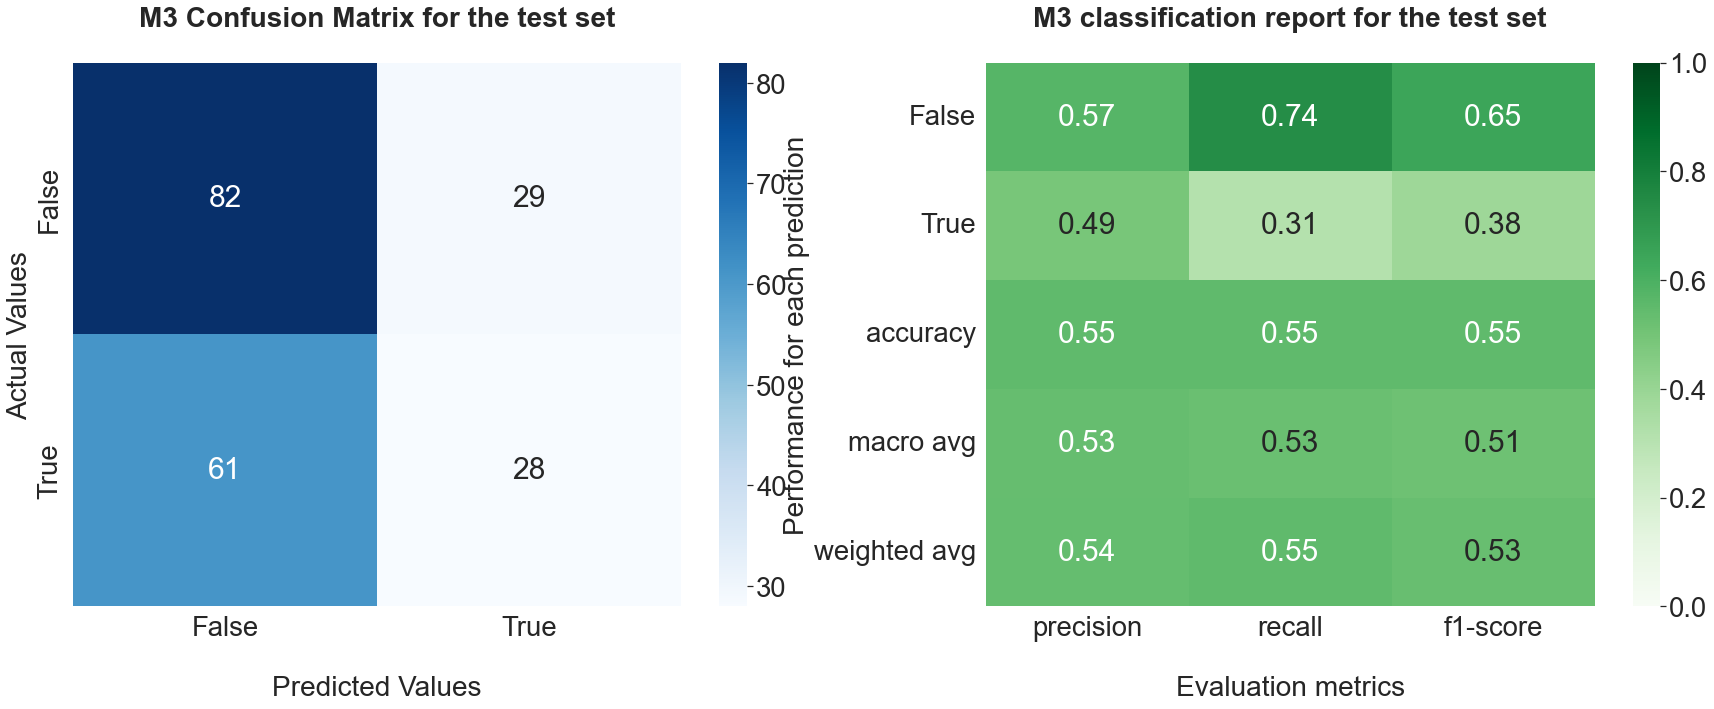

In [ ]:
# Initialize the best model with the chosen hyperparameter settings.
ada_classifier = AdaBoostClassifier(n_estimators=50)
# Fit the training dataset onto it (train the model).
ada_classifier.fit(x_train, y_train)
# Fit the training dataset onto it (train the model).
ada_classifier_predictions = ada_classifier.predict(x_test)

# Print the accuracy score of M3 on the test set 
print(accuracy_score(y_test, ada_classifier_predictions))

# Compute the Confusion Matrix of M3 on the test set 
cf_matrix = confusion_matrix(y_test, ada_classifier_predictions)
# Compute Classification report of the performance of M3 on test set 
clf_report = classification_report(y_test,ada_classifier_predictions, output_dict=True, target_names=['False', 'True'])

# Display the visualization of the Confusion Matrix.
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.set(font_scale = 2.5)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('M3 Confusion Matrix for the test set\n', fontsize= 28, fontweight='bold')
ax[0].set_xlabel('\nPredicted Values', fontsize= 28)
ax[0].set_ylabel('Actual Values', fontsize= 28)
ax[0].xaxis.set_ticklabels(['False','True'])
ax[0].yaxis.set_ticklabels(['False','True'])
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title('M3 classification report for the test set\n', fontsize= 28, fontweight='bold')
ax[1].set_xlabel('\nEvaluation metrics', fontsize= 28)
ax[1].set_ylabel('Performance for each prediction', fontsize= 28)
plt.show()

**Start Of Testing SubGroups For Discriptors individually**

In [ ]:
#Gender subgroups
#split test set by gender
is_male_set = test_set['gender'] == 'male'
male_df = test_set[is_male_set]
print(len(male_df))

is_female_set = test_set['gender'] == 'female'
female_df = test_set[is_female_set]
print(len(female_df))

is_other_set = test_set['gender'] == 'other'
other_df = test_set[is_other_set]
print(len(other_df))

#Create X and Y values for all genders
male_x_test = male_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
male_y_test = male_df["decision"]

female_x_test = female_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
female_y_test = female_df["decision"]

other_x_test = other_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
other_y_test = other_df["decision"]


112
81
7


In [ ]:
#Male subgroup
#user M3 to make prediction on the male test set
male_ada_predict = ada_classifier.predict(male_x_test)
print(accuracy_score(male_y_test, male_ada_predict))

#Comnpute confusion matrix on the performance of M3 on the male test set
male_cf_matrix = confusion_matrix(male_y_test, male_ada_predict)

#Comnpute Classification report on the performance of M3 on the male test set
male_clf_report = classification_report(male_y_test, male_ada_predict, output_dict=True, target_names=['False', 'True'])

0.5


In [ ]:
#Female subgroup
#user M3 to make prediction on the female test set
female_ada_predict = ada_classifier.predict(female_x_test)
print(accuracy_score(female_y_test, female_ada_predict))

#Comnpute confusion matrix on the performance of M3 on the female test set
female_cf_matrix = confusion_matrix(female_y_test, female_ada_predict)

#Comnpute Classification report on the performance of M3 on No Programming EXP test set
female_clf_report = classification_report(female_y_test, female_ada_predict, output_dict=True, target_names=['False', 'True'])

0.6296296296296297


In [ ]:
#Other subgroup
#user M3 to make prediction on the other test set
other_ada_predict = ada_classifier.predict(other_x_test)
print(accuracy_score(other_y_test, other_ada_predict))

#Comnpute confusion matrix on the performance of M3 on the other test set
other_cf_matrix = confusion_matrix(other_y_test, other_ada_predict)

#Comnpute Classification report on the performance of M3 on the other test set
other_clf_report = classification_report(other_y_test, other_ada_predict, output_dict=True, target_names=['False', 'True'])

0.42857142857142855


In [ ]:
#Nationality subgroups
#split test set by nationality
is_dutch = test_set['nationality'] == 'Dutch'
dutch_df = test_set[is_dutch]
print(len(dutch_df))

is_german = test_set['nationality'] == 'German'
german_df = test_set[is_german]
print(len(german_df))

is_belgian = test_set['nationality'] == 'Belgian'
belgian_df = test_set[is_belgian]
print(len(belgian_df))

#Create X and Y values for all nationalities
dut_x_test = dutch_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
dut_y_test = dutch_df["decision"]

ger_x_test = german_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
ger_y_test = german_df["decision"]

bel_x_test = belgian_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
bel_y_test = belgian_df["decision"]

151
26
23


In [ ]:
#Dutch subgroup
#user M3 to make prediction on the Dutch test set
dut_ada_predict = ada_classifier.predict(dut_x_test)
print(accuracy_score(dut_y_test, dut_ada_predict))

#Comnpute confusion matrix on the performance of M3 on the nationality test set
dut_cf_matrix = confusion_matrix(dut_y_test, dut_ada_predict)

#Comnpute Classification report on the performance of M3 on the nationality test set
dut_clf_report = classification_report(dut_y_test, dut_ada_predict, output_dict=True, target_names=['False', 'True'])

0.5629139072847682


In [ ]:
#German subgroup
#user M3 to make prediction on the German test set
ger_ada_predict = ada_classifier.predict(ger_x_test)
print(accuracy_score(ger_y_test, ger_ada_predict))

#Comnpute confusion matrix on the performance of M3 on not In debate test set
ger_cf_matrix = confusion_matrix(ger_y_test, ger_ada_predict)

#Comnpute Classification report on the performance of M3 on not In debate test set
ger_clf_report = classification_report(ger_y_test, ger_ada_predict, output_dict=True, target_names=['False', 'True'])

0.5384615384615384


In [ ]:
#Belgian subgroup
#user M3 to make prediction on the Belgian test set
bel_ada_predict = ada_classifier.predict(bel_x_test)
print(accuracy_score(bel_y_test, bel_ada_predict))

#Comnpute confusion matrix on the performance of M3 on the nationality test set
bel_cf_matrix = confusion_matrix(bel_y_test, bel_ada_predict)

#Comnpute Classification report on the performance of M3 on the nationality test set
bel_clf_report = classification_report(bel_y_test, bel_ada_predict, output_dict=True, target_names=['False', 'True'])

0.4782608695652174


Text(0.5, 1.0, 'M3 Subgroup Of Belgian Individuals\n')

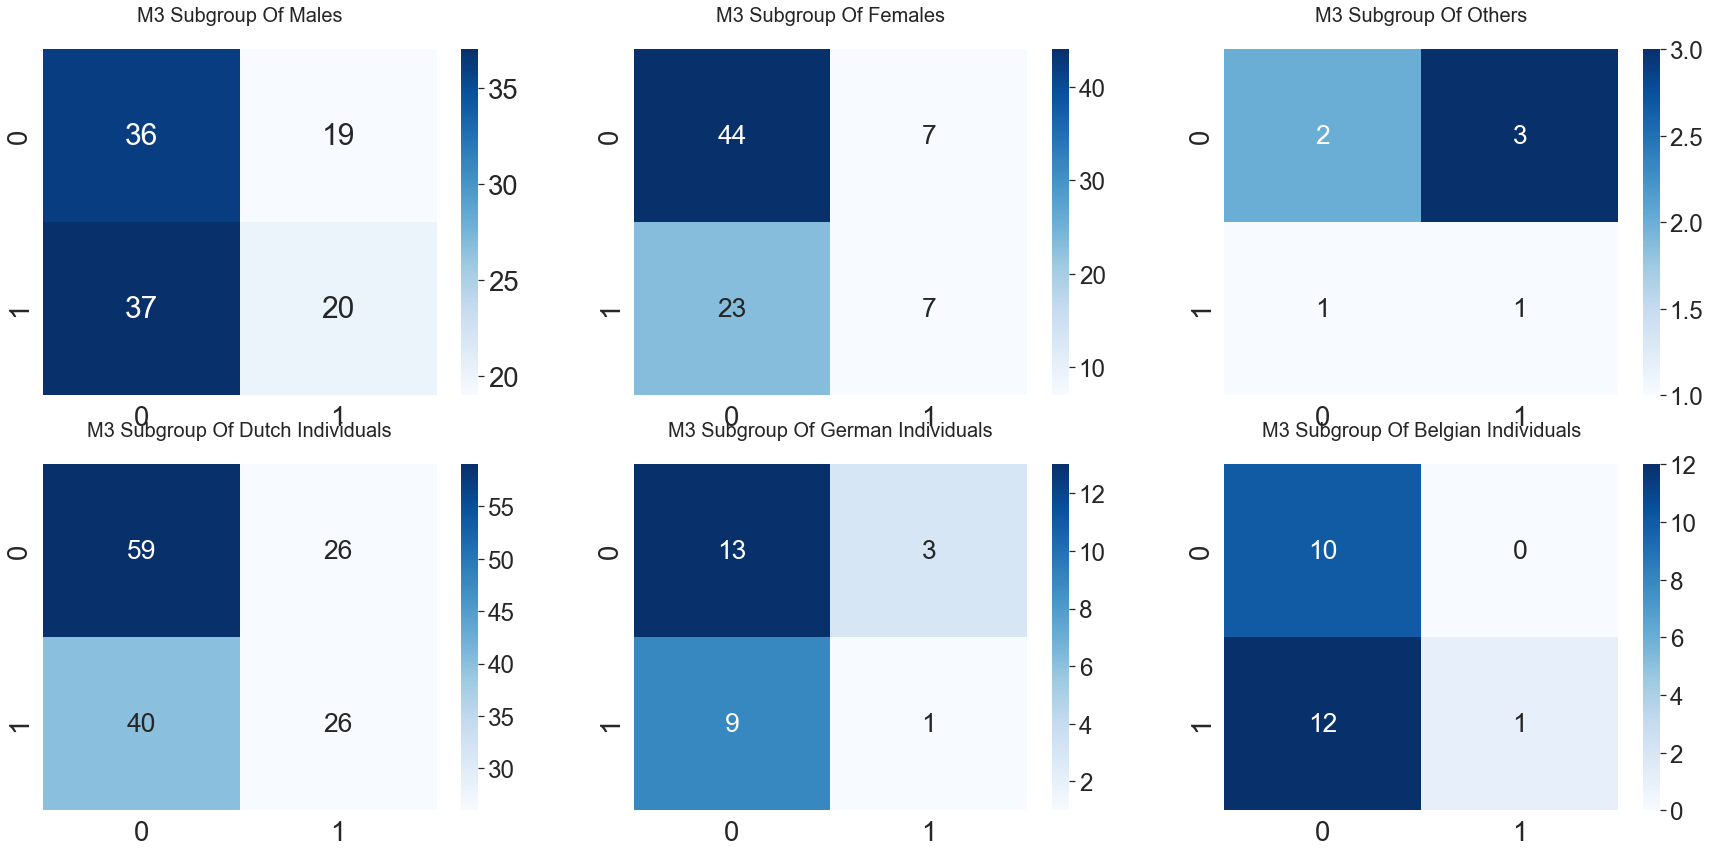

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30,14))

# Display the visualization of the Confusion Matrix of the gender subgroups.
sns.heatmap(male_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 0])
sns.set(font_scale = 2.2)
ax[0, 0].set_title('M3 Subgroup Of Males\n', fontsize = 20)
sns.heatmap(female_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 1])
ax[0, 1].set_title('M3 Subgroup Of Females\n', fontsize = 20)
sns.heatmap(other_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 2])
ax[0, 2].set_title('M3 Subgroup Of Others\n', fontsize = 20)

# Display the visualization of the Confusion Matrix of the nationality subgroups.
sns.heatmap(dut_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 0])
sns.set(font_scale = 2.2)
ax[1, 0].set_title('M3 Subgroup Of Dutch Individuals\n', fontsize = 20)
sns.heatmap(ger_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 1])
ax[1, 1].set_title('M3 Subgroup Of German Individuals\n', fontsize = 20)
sns.heatmap(bel_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 2])
ax[1, 2].set_title('M3 Subgroup Of Belgian Individuals\n', fontsize = 20)

Text(0.5, 1.0, 'M3 Subgroup Of Belgian Individuals\n')

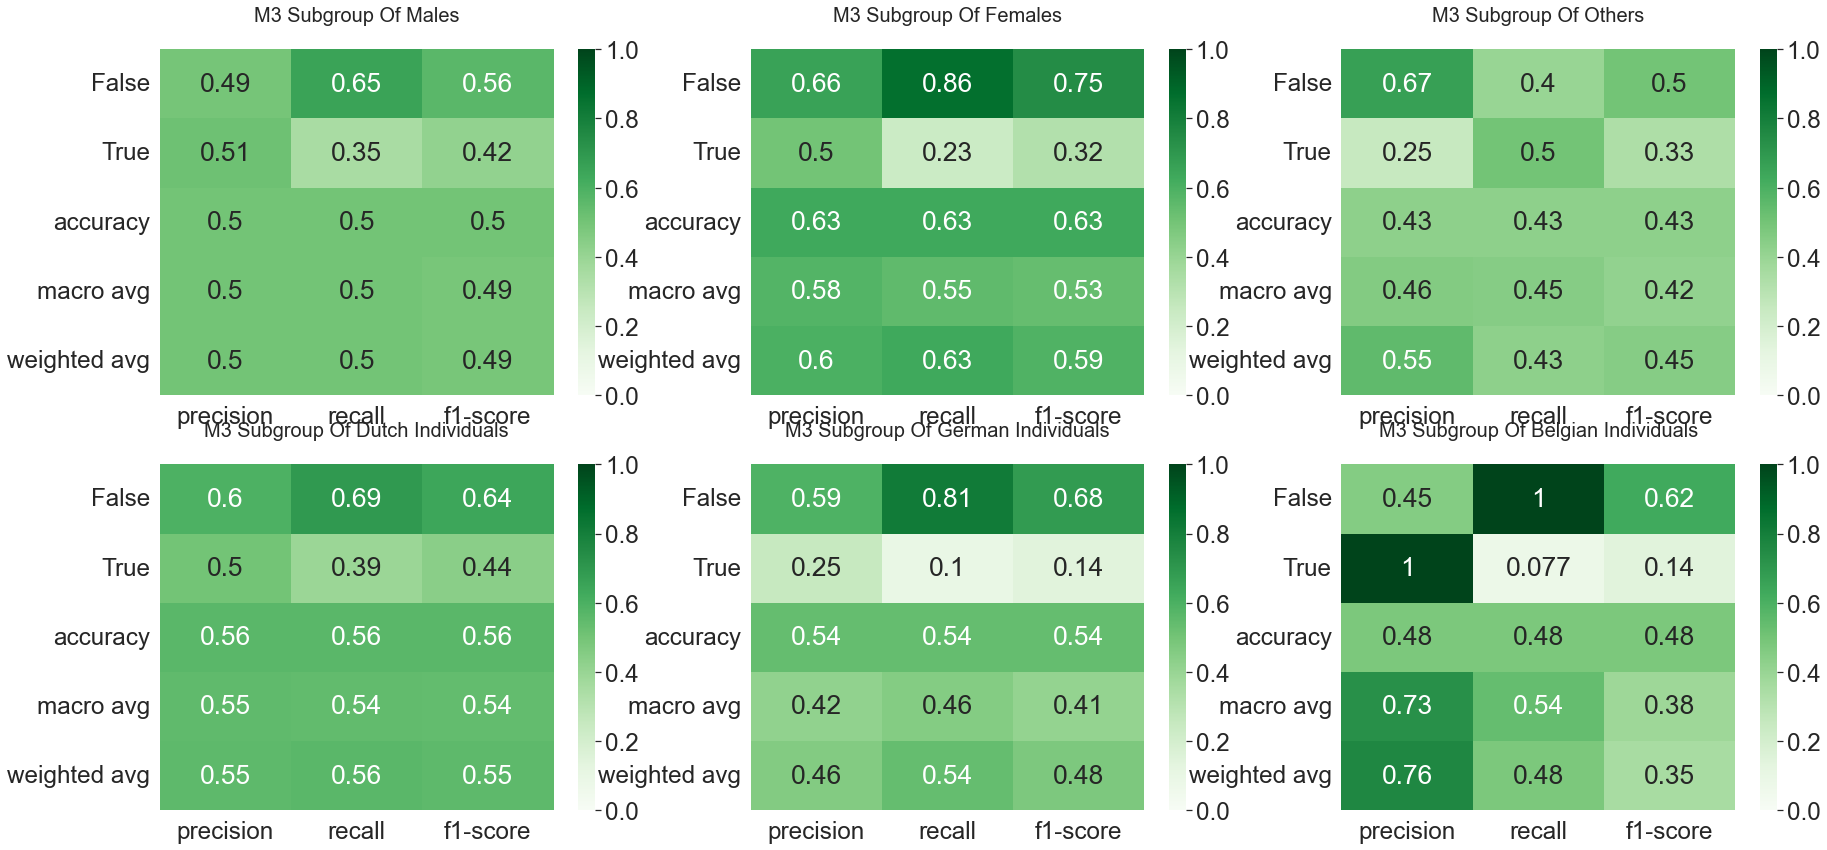

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30,14))

# Display the visualization of the Classification Report of the gender subgroups.
sns.heatmap(pd.DataFrame(male_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 0])
sns.set(font_scale = 2.2)
ax[0, 0].set_title('M3 Subgroup Of Males\n', fontsize = 20)
sns.heatmap(pd.DataFrame(female_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 1])
ax[0, 1].set_title('M3 Subgroup Of Females\n', fontsize = 20)
sns.heatmap(pd.DataFrame(other_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 2])
ax[0, 2].set_title('M3 Subgroup Of Others\n', fontsize = 20)

# Display the visualization of the Classification Report of the nationality subgroups.
sns.heatmap(pd.DataFrame(dut_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 0])
sns.set(font_scale = 2.2)
ax[1, 0].set_title('M3 Subgroup Of Dutch Individuals\n', fontsize = 20)
sns.heatmap(pd.DataFrame(ger_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 1])
ax[1, 1].set_title('M3 Subgroup Of German Individuals\n', fontsize = 20)
sns.heatmap(pd.DataFrame(bel_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 2])
ax[1, 2].set_title('M3 Subgroup Of Belgian Individuals\n', fontsize = 20)

**Start Of Testing SubGroups For Discriptors combinations**

In [ ]:
import random
genders = ['male', 'female', 'other']
nationalities = ['Dutch', 'German', 'Belgian']

# Subgroup of Ducth Male Individuals
is_male = test_set['gender'] == 'male'
male_df = test_set[is_male]
is_male_Dutch = male_df['nationality']=='Dutch'
male_Dutch_df = male_df[is_male_Dutch]
male_Dutch_x_test = male_Dutch_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
male_Dutch_y_test = male_Dutch_df["decision"]
male_Dutch_prediction = ada_classifier.predict(male_Dutch_x_test)
male_Dutch_cf_matrix = confusion_matrix(male_Dutch_y_test, male_Dutch_prediction)
male_Dutch_clf_report = classification_report(male_Dutch_y_test, male_Dutch_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of German Male Individuals
is_male = test_set['gender'] == 'male'
male_df = test_set[is_male]
is_male_German = male_df['nationality']=='German'
male_German_df = male_df[is_male_German]
male_German_x_test = male_German_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
male_German_y_test = male_German_df["decision"]
male_German_prediction = ada_classifier.predict(male_German_x_test)
male_German_cf_matrix = confusion_matrix(male_German_y_test, male_German_prediction)
male_German_clf_report = classification_report(male_German_y_test, male_German_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of Belgian Male Individuals
is_male = test_set['gender'] == 'male'
male_df = test_set[is_male]
is_male_Belgian = male_df['nationality']=='Belgian'
male_Belgian_df = male_df[is_male_Belgian]
male_Belgian_x_test = male_Belgian_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
male_Belgian_y_test = male_Belgian_df["decision"]
male_Belgian_prediction = ada_classifier.predict(male_Belgian_x_test)
male_Belgian_cf_matrix = confusion_matrix(male_Belgian_y_test, male_Belgian_prediction)
male_Belgian_clf_report = classification_report(male_Belgian_y_test, male_Belgian_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of Ducth Female Individuals
is_female = test_set['gender'] == 'female'
female_df = test_set[is_female]
is_female_Dutch = female_df['nationality']=='Dutch'
female_Dutch_df = female_df[is_female_Dutch]
female_Dutch_x_test = female_Dutch_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
female_Dutch_y_test = female_Dutch_df["decision"]
female_Dutch_prediction = ada_classifier.predict(female_Dutch_x_test)
female_Dutch_cf_matrix = confusion_matrix(female_Dutch_y_test, female_Dutch_prediction)
female_Dutch_clf_report = classification_report(female_Dutch_y_test, female_Dutch_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of German Female Individuals
is_female = test_set['gender'] == 'female'
female_df = test_set[is_female]
is_female_German = female_df['nationality']=='German'
female_German_df = female_df[is_female_German]
female_German_x_test = female_German_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
female_German_y_test = female_German_df["decision"]
female_German_prediction = ada_classifier.predict(female_German_x_test)
female_German_cf_matrix = confusion_matrix(female_German_y_test, female_German_prediction)
female_German_clf_report = classification_report(female_German_y_test, female_German_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of Belgian Female Individuals
is_female = test_set['gender'] == 'female'
female_df = test_set[is_female]
is_female_Belgian = female_df['nationality']=='Belgian'
female_Belgian_df = female_df[is_female_Belgian]
female_Belgian_x_test = female_Belgian_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
female_Belgian_y_test = female_Belgian_df["decision"]
female_Belgian_prediction = ada_classifier.predict(female_Belgian_x_test)
female_Belgian_cf_matrix = confusion_matrix(female_Belgian_y_test, female_Belgian_prediction)
female_Belgian_clf_report = classification_report(female_Belgian_y_test, female_Belgian_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of Dutch Other Individuals
is_other = test_set['gender'] == 'other'
other_df = test_set[is_other]
is_other_Dutch = other_df['nationality']=='Dutch'
other_Dutch_df = other_df[is_other_Dutch]
other_Dutch_x_test = other_Dutch_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
other_Dutch_y_test = other_Dutch_df["decision"]
other_Dutch_prediction = ada_classifier.predict(other_Dutch_x_test)
other_Dutch_cf_matrix = confusion_matrix(other_Dutch_y_test, other_Dutch_prediction)
other_Dutch_clf_report = classification_report(other_Dutch_y_test, other_Dutch_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of German Other Individuals
is_other = test_set['gender'] == 'other'
other_df = test_set[is_other]
is_other_German = other_df['nationality']=='German'
other_German_df = other_df[is_other_German]
other_German_x_test = other_German_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
other_German_y_test = other_German_df["decision"]
other_German_prediction = ada_classifier.predict(other_German_x_test)
other_German_cf_matrix = confusion_matrix(other_German_y_test, other_German_prediction)
other_German_clf_report = classification_report(other_German_y_test, other_German_prediction, output_dict=True, target_names=['False', 'True'])

# Subgroup of Belgian Other Individuals
is_other = test_set['gender'] == 'other'
other_df = test_set[is_other]
is_other_Belgian = other_df['nationality']=='Belgian'
other_Belgian_df = other_df[is_other_Belgian]
other_Belgian_x_test = other_Belgian_df.loc[:, ["female","male","other", "Dutch", "German", "Belgian", "Swimming", "Golf", "Running", "Cricket", "Chess", "Tennis", "Football", 'age']]
other_Belgian_y_test = other_Belgian_df["decision"]
other_Belgian_prediction = ada_classifier.predict(other_Belgian_x_test)
other_Belgian_cf_matrix = confusion_matrix(other_Belgian_y_test, other_Belgian_prediction)
other_Belgian_clf_report = classification_report(other_Belgian_y_test, other_Belgian_prediction, output_dict=True, target_names=['False'])

D:\Jawad\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jawad\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jawad\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jawad\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1318: Und

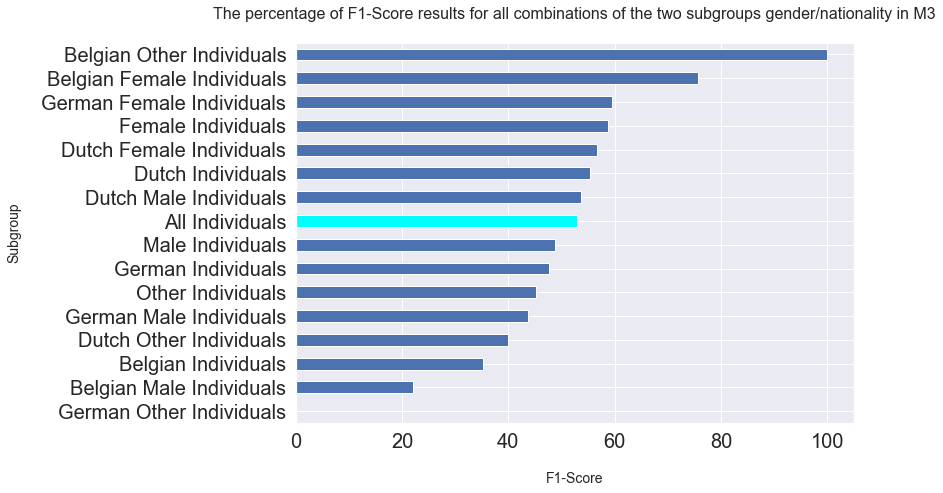

In [ ]:
# Create new dictionary for all the results of combinations for the two subgroups gender/nationality
sub_dict ={}
sub_dict['Male Individuals'] = male_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Female Individuals'] = female_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Other Individuals'] = other_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Individuals'] = dut_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Individuals'] = ger_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Individuals'] = bel_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Male Individuals'] = male_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Male Individuals'] = male_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Male Individuals'] = male_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Female Individuals'] = female_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Female Individuals'] = female_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Female Individuals'] = female_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Other Individuals'] = other_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Other Individuals'] = other_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Other Individuals'] = other_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['All Individuals'] = clf_report['weighted avg']['f1-score'] * 100
sns.set(font_scale = 1.3)

# Create a dataframe from the dictionary
sub_df = pd.DataFrame(list(sub_dict.items()),columns = ['Subgroup', 'F1-Score']) 

# Sort the values based on their F1-scores
sub_df.sort_values('F1-Score',inplace=True)

# Plot a horizontal bar chart to better show the subgroups who are at a disadvantage
colors = ['b','b','b','b','b','b','b','b','cyan','b','b','b','b','b','b']
ax = sub_df.plot.barh(x='Subgroup', y='F1-Score', figsize=(10,7), color = colors, fontsize = 20)
ax.set_title('The percentage of F1-Score results for all combinations of the two subgroups gender/nationality in M3\n', fontsize= 16)
ax.set_ylabel('Subgroup\n', fontsize= 14)
ax.set_xlabel('\nF1-Score', fontsize= 14)
ax.get_legend().remove()

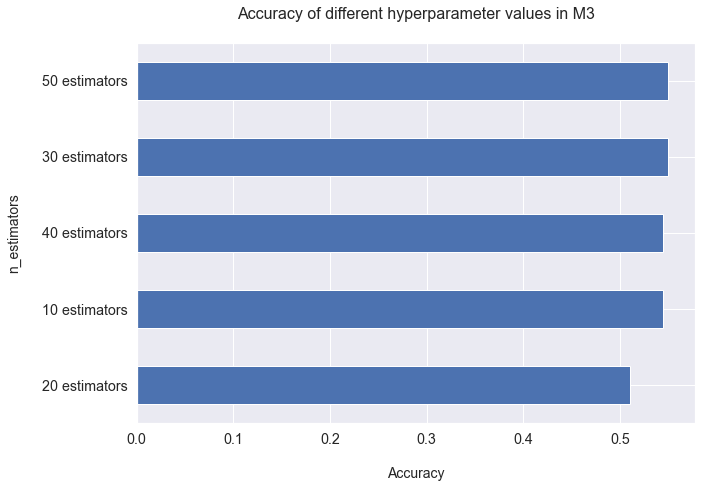

In [ ]:
#Storing the accuracy of each n_estimator
res_10 = 0.545
res_20 = 0.51
res_30 = 0.55
res_40 = 0.545
res_50 = 0.55

# Create new dictionary for the results of each n_estimator
sub_dict ={}
sub_dict['10 estimators'] = res_10
sub_dict['20 estimators'] = res_20
sub_dict['30 estimators'] = res_30
sub_dict['40 estimators'] = res_40
sub_dict['50 estimators'] = res_50

# Create a dataframe from the dictionary
sub_df = pd.DataFrame(list(sub_dict.items()),columns = ['n_estimators', 'Accuracy'])

# Sort the values based on their accuracy
sub_df.sort_values('Accuracy',inplace=True)

# Plot a horizontal bar chart to better show which performed best
ax = sub_df.plot.barh(x='n_estimators', y='Accuracy', figsize=(10,7))
ax.set_title('Accuracy of different hyperparameter values in M3\n', fontsize= 16)
ax.set_ylabel('n_estimators\n', fontsize= 14)
ax.set_xlabel('\nAccuracy', fontsize= 14)
ax.get_legend().remove()


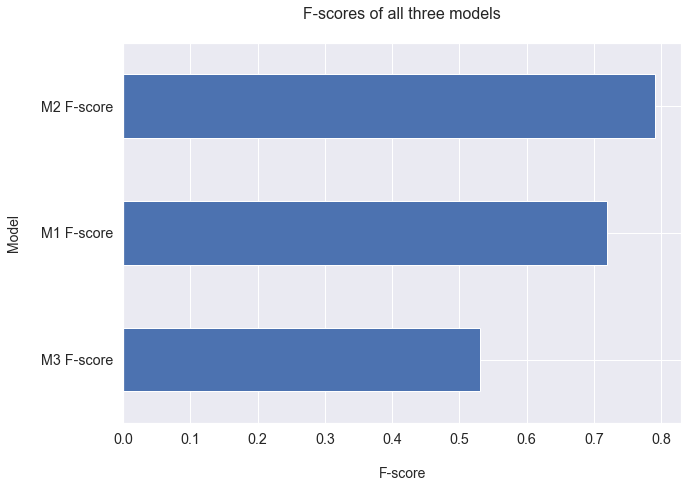

In [ ]:
#Store the F1-scores of each model
m1_fscore = 0.72
m2_fscore = 0.79
m3_fscore = 0.53

# Create new dictionary for the F1-scores of each model
sub_dict ={}
sub_dict['M1 F-score'] = m1_fscore
sub_dict['M2 F-score'] = m2_fscore
sub_dict['M3 F-score'] = m3_fscore

# Create a dataframe from the dictionary
sub_df = pd.DataFrame(list(sub_dict.items()),columns = ['Model', 'F-score'])

# Sort the values based on their accuracy
sub_df.sort_values('F-score',inplace=True)

# Plot a horizontal bar chart to better show which performed best
ax = sub_df.plot.barh(x='Model', y='F-score', figsize=(10,7))
ax.set_title('F-scores of all three models\n', fontsize= 16)
ax.set_ylabel('Model\n', fontsize= 14)
ax.set_xlabel('\nF-score', fontsize= 14)
ax.get_legend().remove()